<a href="https://colab.research.google.com/github/aryan16x/Computer-Vision/blob/main/Sec4_2DGeometricTransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
grayImg = r'/content/grayImg1.jpg'
colorImg1 = r'/content/colorImg1.jpg'
colorImg2 = r'/content/colorImg2.jpg'

In [3]:
gImg = cv2.imread(grayImg, cv2.IMREAD_GRAYSCALE)
c_BGR1 = cv2.imread(colorImg1)
c_BGR2 = cv2.imread(colorImg2)
c_RGB1 = c_BGR1[:,:,::-1]
c_RGB2 = c_BGR2[:,:,::-1]



---

**81 - Rotation Implementation**


---



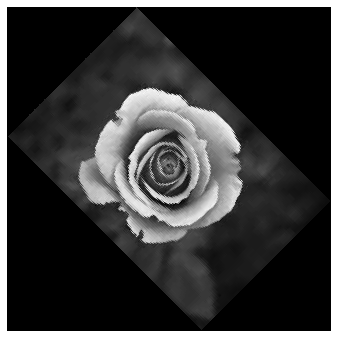

In [4]:
import matplotlib as mpl

def displayImgInOriginalSize(I):
  dpi = mpl.rcParams['figure.dpi']      # dpi = dots per inch
  H,W = I.shape
  figSize = W/float(dpi), H/float(dpi)
  fig = plt.figure(figsize = figSize)
  ax = fig.add_axes([0, 0, 1, 1])
  ax.axis('off')
  ax.imshow(I, cmap='gray')
  plt.show()

def bilinearInter(row, col, I):
  lc = int(col)
  rc = lc+1
  wr = (col-lc)
  wl = (rc-col)
  tr = int(row)
  br = tr+1
  wt = (row-tr)
  wb = (br-row)
  if tr>=0 and br<I.shape[0] and lc>=0 and rc<I.shape[1]:
    a = I[tr,lc]*wl+I[tr,rc]*wr
    b = I[br,lc]*wl+I[br,rc]*wr
    intensity = a*wt+b*wb
    return int(intensity)
  return 0

a = -45
ca = np.cos(np.deg2rad(a))
sa = np.sin(np.deg2rad(a))
R = np.array([[ca, -sa],
              [sa, ca]])

rMax,cMax = gImg.shape[0],gImg.shape[1]
cords = np.array([[0,0],
                  [0,cMax-1],
                  [rMax-1,0],
                  [rMax-1,cMax-1]])
cordsDash = R.dot(cords.T)

mins = np.int64(np.floor(cordsDash.min(axis=1)))
maxs = np.int64(np.ceil(cordsDash.max(axis=1)))

minR = mins[0]
minC = mins[1]
maxR = maxs[0]
maxC = maxs[1]

height,width = maxR-minR+1, maxC-minC+1

I2 = np.zeros((height,width), dtype='uint8')

Tinv = np.linalg.inv(R)

for newi in range(minR,maxR):
  for newj in range(minC,maxC):
    Pdash = np.array([newi,newj])    
    P = Tinv.dot(Pdash)
    i,j = P[0],P[1]
    if i<0 or i>=gImg.shape[0] or j<0 or j>=gImg.shape[1]:      # only to avoid error         
      pass
    else:
      g = bilinearInter(i, j, gImg)
      I2[newi-minR,newj-minC] = g

displayImgInOriginalSize(I2)

In [5]:
# Wrap up the code in fucntion

def getExtents(T, rMax, cMax):
  cords = np.array([[0,0],
                  [0,cMax-1],
                  [rMax-1,0],
                  [rMax-1,cMax-1]])
  cordsDash = T.dot(cords.T)

  mins = np.int64(np.floor(cordsDash.min(axis=1)))
  maxs = np.int64(np.ceil(cordsDash.max(axis=1)))

  minR = mins[0]
  minC = mins[1]
  maxR = maxs[0]
  maxC = maxs[1]

  height,width = maxR-minR+1, maxC-minC+1
  return minR,minC,maxR,maxC,height,width

In [7]:
def transform(T, gImg):
  minR,minC,maxR,maxC,height,width = getExtents(T, gImg.shape[0], gImg.shape[1])
  Tinv = np.linalg.inv(T)
  I2 = np.zeros((height,width), dtype='uint8')

  for newi in range(minR,maxR):
    for newj in range(minC,maxC):
      Pdash = np.array([newi,newj])    
      P = Tinv.dot(Pdash)
      i,j = P[0],P[1]
      if i<0 or i>=gImg.shape[0] or j<0 or j>=gImg.shape[1]:      # only to avoid error         
        pass
      else:
        g = bilinearInter(i, j, gImg)
        I2[newi-minR,newj-minC] = g
  return I2

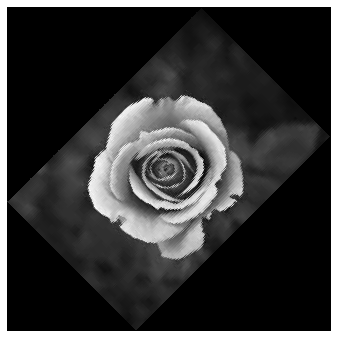

In [10]:
a = 45
ca = np.cos(np.deg2rad(a))
sa = np.sin(np.deg2rad(a))
R = np.array([[ca, -sa],
              [sa, ca]])
imgx = transform(R, gImg)
displayImgInOriginalSize(imgx)



---

**86 - Rotate image using openCV**


---



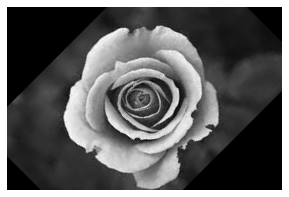

In [15]:
image = gImg
imageCenter = tuple(np.array(image.shape[1::-1])/2)
a = 45
scale = 1.0
rotMat = cv2.getRotationMatrix2D(imageCenter, a, scale)
i = cv2.warpAffine(image, rotMat, image.shape[::-1])
displayImgInOriginalSize(i)



---

**90 - Reflection Implementation**


---



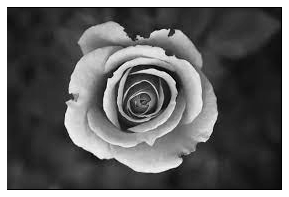

In [22]:
T = np.array([[-1, 0 ],
              [0, 1]])

# To flip the image : y-axis
# T = np.array([[-1, 0 ],
#               [0, 1]]) 

I2 = transform(T, gImg)
displayImgInOriginalSize(I2)

**Reflection using openCV**

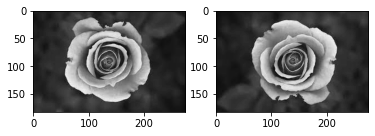

In [25]:
I2 = cv2.flip(gImg, 0)
I3 = cv2.flip(gImg, 1)

plt.figure(1)
plt.subplot(121)
plt.imshow(I2, cmap='gray')
plt.subplot(122)
plt.imshow(I3, cmap='gray')
plt.show()



---

**96 - Shear Implementation**


---



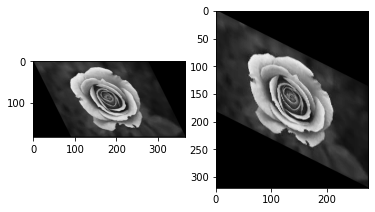

In [36]:
T1 = np.array([[1, 0 ],
              [0.5, 1]])

# To flip the image : y-axis
T2 = np.array([[1, 0.5 ],
              [0, 1]]) 

I2 = transform(T1, gImg)
I3 = transform(T2, gImg)

plt.figure(1)
plt.subplot(121)
plt.imshow(I2, cmap='gray')
plt.subplot(122)
plt.imshow(I3, cmap='gray')
plt.show()



---

**101 - Affine Transformation Implementation**

---

In [39]:
# Wrap up the code in fucntion

def getExtentsAffine(T, rMax, cMax):
  cords = np.array([[0,0,1],
                  [0,cMax-1,1],
                  [rMax-1,0,1],
                  [rMax-1,cMax-1,1]])
  cordsDash = T.dot(cords.T)

  mins = np.int64(np.floor(cordsDash.min(axis=1)))
  maxs = np.int64(np.ceil(cordsDash.max(axis=1)))

  minR = mins[0]
  minC = mins[1]
  maxR = maxs[0]
  maxC = maxs[1]

  height,width = maxR-minR+1, maxC-minC+1
  return minR,minC,maxR,maxC,height,width

In [40]:
def transformAffine(T, gImg):
  minR,minC,maxR,maxC,height,width = getExtentsAffine(T, gImg.shape[0], gImg.shape[1])
  Tinv = np.linalg.inv(T)
  I2 = np.zeros((height,width), dtype='uint8')

  for newi in range(minR,maxR):
    for newj in range(minC,maxC):
      Pdash = np.array([newi,newj,1])    
      P = Tinv.dot(Pdash)
      i,j = P[0],P[1]
      if i<0 or i>=gImg.shape[0] or j<0 or j>=gImg.shape[1]:      # only to avoid error         
        pass
      else:
        g = bilinearInter(i, j, gImg)
        I2[newi-minR,newj-minC] = g
  return I2

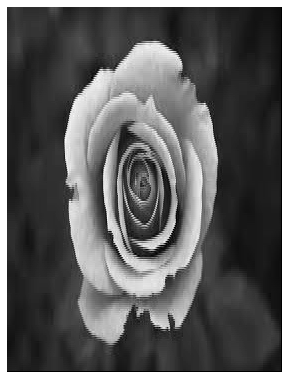

In [45]:
T = np.array([[2, 0 , 10],
              [0, 1, 20],
              [0, 0, 1]])

I2 = transformAffine(T, gImg)
displayImgInOriginalSize(I2)



---

**104 - Roatation about any Point**

---





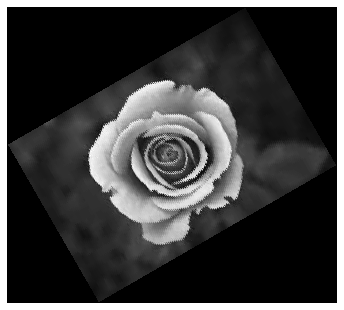

In [53]:
a = 30
ca = np.cos(np.deg2rad(a))
sa = np.sin(np.deg2rad(a))
R = np.array([[ca, -sa, 0],
              [sa, ca, 0],
              [0, 0, 1]])
T = np.array([[1, 0, -150],
              [0, 1, -100],
              [0, 0, 1]])
A = np.linalg.inv(T).dot(R).dot(T)

I2 = transformAffine(A, gImg)
displayImgInOriginalSize(I2)



---

**112 - Projective Transformation Implementation**


---

In [54]:
def getExtentsProjective(T, rMax, cMax):
  cords = np.array([[0,0,1],
                  [0,cMax-1,1],
                  [rMax-1,0,1],
                  [rMax-1,cMax-1,1]])
  cordsDash = T.dot(cords.T)
  cordsDash /= cordsDash[2,:]

  mins = np.int64(np.floor(cordsDash.min(axis=1)))
  maxs = np.int64(np.ceil(cordsDash.max(axis=1)))

  minR = mins[0]
  minC = mins[1]
  maxR = maxs[0]
  maxC = maxs[1]

  height,width = maxR-minR+1, maxC-minC+1
  return minR,minC,maxR,maxC,height,width

In [55]:
def transformProjective(T, gImg):
  minR,minC,maxR,maxC,height,width = getExtentsProjective(T, gImg.shape[0], gImg.shape[1])
  Tinv = np.linalg.inv(T)
  I2 = np.zeros((height,width), dtype='uint8')

  for newi in range(minR,maxR):
    for newj in range(minC,maxC):
      Pdash = np.array([newi,newj,1])    
      P = Tinv.dot(Pdash)
      P /= P[2]
      i,j = P[0],P[1]
      if i<0 or i>=gImg.shape[0] or j<0 or j>=gImg.shape[1]:      # only to avoid error         
        pass
      else:
        g = bilinearInter(i, j, gImg)
        I2[newi-minR,newj-minC] = g
  return I2

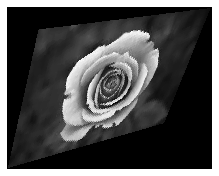

In [63]:
T = np.array([[1, 0 , 100],
              [0, 1, 200],
              [0.001, 0.001, 1]])

I2 = transformProjective(T, gImg)
displayImgInOriginalSize(I2)